<a href="https://colab.research.google.com/github/VongolaXIman/107-2-Multimedia/blob/master/Keras_Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料預處理

In [0]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [0]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [0]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [0]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128, activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10,activation='softmax'))

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [0]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 6s - loss: 0.4887 - acc: 0.8476 - val_loss: 0.0976 - val_acc: 0.9719
Epoch 2/20
 - 1s - loss: 0.1424 - acc: 0.9582 - val_loss: 0.0631 - val_acc: 0.9801
Epoch 3/20
 - 1s - loss: 0.1036 - acc: 0.9692 - val_loss: 0.0515 - val_acc: 0.9838
Epoch 4/20
 - 1s - loss: 0.0844 - acc: 0.9753 - val_loss: 0.0464 - val_acc: 0.9861
Epoch 5/20
 - 1s - loss: 0.0728 - acc: 0.9774 - val_loss: 0.0395 - val_acc: 0.9879
Epoch 6/20
 - 1s - loss: 0.0651 - acc: 0.9808 - val_loss: 0.0394 - val_acc: 0.9880
Epoch 7/20
 - 1s - loss: 0.0572 - acc: 0.9826 - val_loss: 0.0439 - val_acc: 0.9865
Epoch 8/20
 - 1s - loss: 0.0528 - acc: 0.9839 - val_loss: 0.0334 - val_acc: 0.9896
Epoch 9/20
 - 1s - loss: 0.0455 - acc: 0.9861 - val_loss: 0.0344 - val_acc: 0.9898
Epoch 10/20
 - 1s - loss: 0.0430 - acc: 0.9872 - val_loss: 0.0339 - val_acc: 0.9901
Epoch 11/20
 - 1s - loss: 0.0414 - acc: 0.9875 - val_loss: 0.0322 - val

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

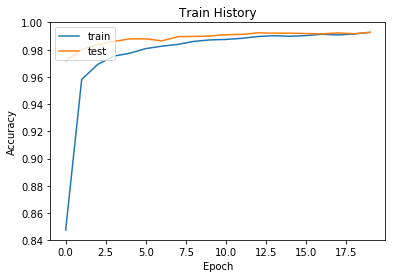

In [0]:
show_train_history('acc','val_acc')

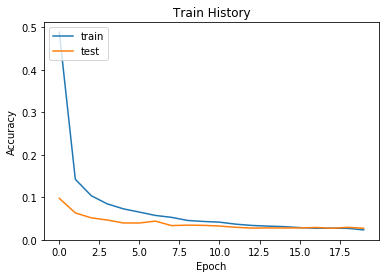

In [0]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [0]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 53us/step


0.9935

# 預測結果

In [0]:
prediction=model.predict_classes(x_Test4D_normalize)

In [0]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

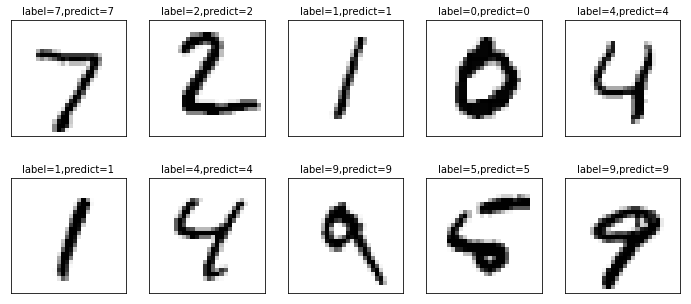

In [0]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [0]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,1,1,1,0
1,0,1133,1,0,0,0,0,1,0,0
2,2,0,1026,0,0,0,0,3,1,0
3,0,0,0,1005,0,3,0,0,2,0
4,0,0,0,0,976,0,1,0,2,3
5,1,0,0,4,0,886,1,0,0,0
6,2,3,0,0,2,2,949,0,0,0
7,0,3,3,1,1,0,0,1016,1,3
8,2,0,1,1,0,1,0,1,966,2


In [0]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [0]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2369,5,3
2597,5,3
5937,5,3
